In [58]:
import snntorch as snn
from snntorch import spikegen
import torch
import struct 
import numpy as np

In [59]:
path = "/home/parvez_alam/Data/SemanticSTF/train/velodyne/2018-02-04_11-25-44_00100.bin"

In [134]:
size_float = 4
list_pcd = []
with open(path, "rb") as f:
        byte = f.read(size_float * 4)
        while byte:
            x, y, z, intensity = struct.unpack("ffff", byte)
            list_pcd.append([x, y, z, intensity])
            byte = f.read(size_float * 4)
        
         
points = torch.tensor(list_pcd)
#x = points[:, 0]
#y = points[:, 1]
#z = points[:, 2]
#r = torch.sqrt(x**2+y**2+z**2).unsqueeze(dim=1)
#points = points / r
    

In [135]:
print(points.shape)

torch.Size([137850, 4])


In [136]:
spike_data = spikegen.rate(points, num_steps=10)

In [137]:
print(spike_data.shape)

torch.Size([10, 137850, 4])


In [138]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML

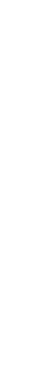

In [139]:
fig, ax = plt.subplots()
anim = splt.animator(spike_data[:, 0:100, :], fig, ax)
# plt.rcParams['animation.ffmpeg_path'] = 'C:\\path\\to\\your\\ffmpeg.exe'

HTML(anim.to_html5_video())

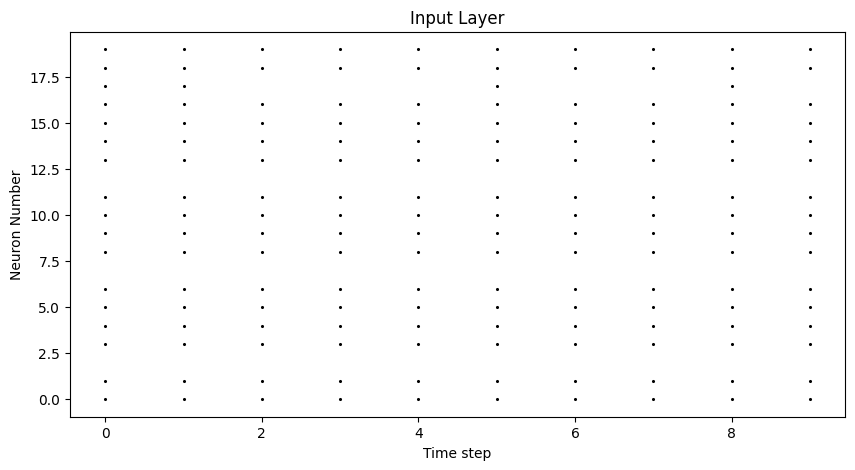

In [140]:
# Reshape
spike_data_sample = spike_data.reshape((10, -1))[:, 100:120]



# raster plot
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data_sample, ax, s=1.5, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

In [141]:
points = points ** 2
summation = points.sum(dim=0).unsqueeze(dim=0)
points = points / summation 
print(points.shape)


torch.Size([137850, 4])


In [142]:
spike_data = spikegen.latency(points, num_steps=100, tau=4, threshold=0.1)

In [143]:
print(spike_data.shape)

torch.Size([100, 137850, 4])


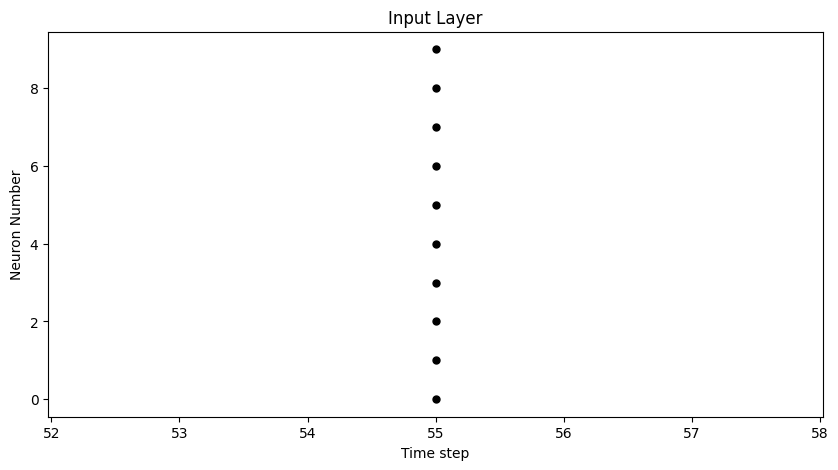

In [144]:
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data.view(100, -1)[:, 1000:1010], ax, s=25, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

# optional save
# fig.savefig('destination_path.png', format='png', dpi=300)

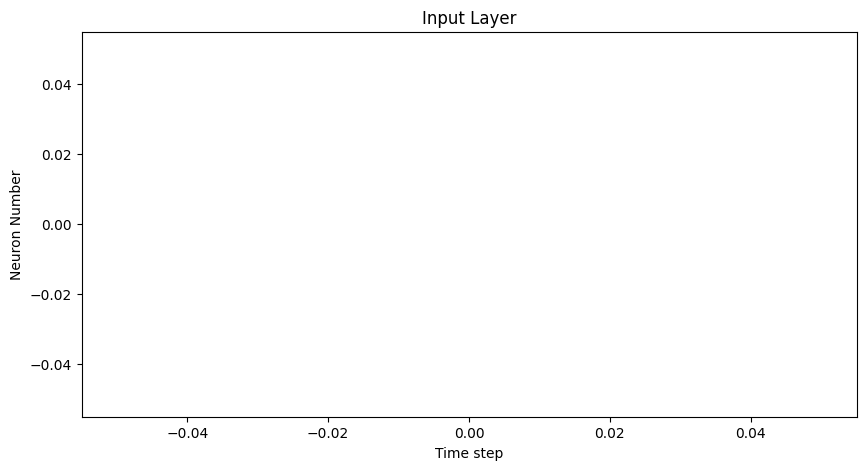

In [145]:
spike_data = spikegen.latency(points, num_steps=100, tau=5, threshold=0.1, linear=True)

fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data[:, 0].view(100, -1)[:, 100:110], ax, s=25, c="black")
plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

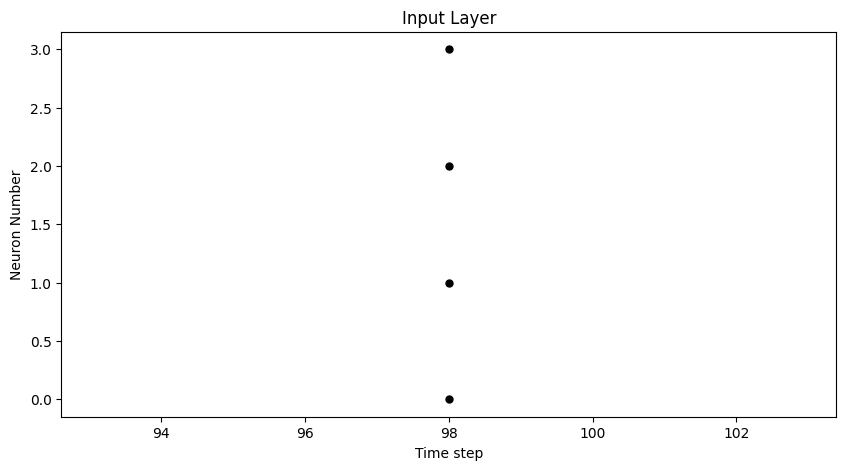

In [148]:
spike_data = spikegen.latency(points, num_steps=100, tau=5, threshold=0.01,
                              normalize=True, linear=True)

fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data[:, 0].view(100, -1), ax, s=25, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

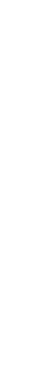

In [147]:
fig, ax = plt.subplots()
anim = splt.animator(spike_data[:, 0:100, :], fig, ax)

HTML(anim.to_html5_video())